Díky své univerzálnosti a rozšiřitelnosti dokáže Python spolupracovat s mnoha rozdílnými jazyky. Obvykle to je z pohledu programátora poměrně jednoduché. Musíme ovšem vědět, že ne vždy je použité řešení optimalizované pro rychlost. Mohou také existovat jistá omezení, týkající se např. kompatibility datových typů.
<!-- TEASER_END -->

Velký přehled možností, jak integrovat Python s jinými jazyky, najdeme na [wiki.python.org](https://wiki.python.org/moin/IntegratingPythonWithOtherLanguages). My se podíváme na některé z jazyků a možností.

## Nízkoúrovňové jazyky
Nízkoúrovňové jazyky už jsme použili pro optimalizaci, takže dobře víme, že jejich volání je poměrně snadné. Shrňme si, jaké jsou nejrozšířenější možnosti.

### C/C++

C konvence (konkrétně cdecl) pro volání funkcí je asi nejrozšířenějším standardem. Pokud takové rozhraní umíme použít, případně vytvořit, máme k dispozici velké množství knihoven.

* Pro volání funkcí z dynamických knihoven můžeme použít [`ctypes`](http://docs.python.org/2/library/ctypes.html).
* [Cython](http://cython.org/] dovoluje volat C/C++.
* [`scipy.weave`](http://docs.scipy.org/doc/scipy/reference/tutorial/weave.html), [Instant](https://bitbucket.org/fenics-project/instant) nebo [Bitey](https://github.com/dabeaz/bitey) umožňuje kompilovat C/C++ kód vložený přímo do Python kódu.
* [F2PY](http://cens.ioc.ee/projects/f2py2e/) umožňuje příomčaře vytvořit Python rozhraní pro C funkci.
* [Boost.Python](http://www.boost.org/doc/libs/1_55_0/libs/python/doc/index.html) zjednodušuje vytváření Python rozhraní pro C++.
* [SWIG](http://www.swig.org/) je tradiční nástroj pro integraci C/C++ do jiných jazyků, včetně Pythonu.

### Fortran

* [F2PY](http://cens.ioc.ee/projects/f2py2e/) umožňuje příomčaře vytvořit Python rozhraní pro Fortran funkci. Pro IPython existuje díky tomu kouzlo `%%fortran`. F2PY má sofistikovanou podporu pro NumPy pole.
* [Forthon](https://github.com/dpgrote/Forthon) dovoluje podobně jako F2PY kombinovat Fortran a Python, navíc podporuje struktury (derived types). Podobně jako F2PY, NumPy pole jsou předávána jen referencí (pokud jsou uložena ve Fortran uspořádání).

## Vysokoúrovňové jazyky

### Java

* Pokud používáme čistý Python bez rozšíření v C/Fortranu apod. (což je případ např. NumPy, Scipy aj.), je nejjednodušší použít [Jython](http://www.jython.org/), což je interpret Pythonu běžící v Java virtuálním stroji. V Jythonu můžeme používat Java knihovny a naopak, Jython má rozhraní pro Javu.
* [Py4J](http://py4j.sourceforge.net/index.html) nebo [JPYPE](http://jpype.sourceforge.net/) dovolují volat Javu z (C)Pythonu. [Pyjnius](http://pyjnius.readthedocs.org/en/latest/) je podobný projekt zaměřený na Android.
* [Jepp](http://jepp.sourceforge.net/) umožňuje opak, tj. volání (C)Pythonu z Javy. Zdá se, že tento projekt je ovšem nedostatečně udržovaný a kompatibilní: http://gillius.org/blog/2012/01/java-and-python-with-jepp-or-not.html. Zde je třeba sledovat [vývoj](https://github.com/mrj0/jep).


## (Primárně) vědecké jazyky 

Jazykům, které jsou primárně určeny pro vědu, numeriku, zpracování dat apod., se budeme věnovat trochu podrobněji. To, že pro Python existují nástroje pro integraci těchto jazyků, je velice důležité pro případný přechod na Python. Pokud totiž máme programy v nějakém z těchto jazyků, nemusíme je hned přepisovat do Pythonu, přesto je v Pythonu můžeme poměrně pohodlně používat. To může být pro mnoho lidí rozhodujícím faktorem pro (ne)použití nového nástroje, v našem případě Pythonu.

### R

R je velice populárním nástrojem pro (statistické) zpracování dat. Zde je nutno poznamenat, že v Python světě slouží k podobným účelům R-kem inspirovaný projekt [Pandas](http://pandas.pydata.org/) a také (poměrně mladý) [ggplot](https://github.com/yhat/ggplot/), což je náhražka za oblíbený [ggplot2](https://github.com/hadley/ggplot2) pro R. Asi hlavním nástrojem pro volání R z Pythonu je [Rpy](http://rpy.sourceforge.net/). Pojďme se podívat na jednoduchou ukázku.

In [1]:
import rpy2.robjects as robjects

In [2]:
pi_r = robjects.r['pi']
print(type(pi_r))
print(pi_r)
print(pi_r[0])

<class 'rpy2.robjects.vectors.FloatVector'>
[1] 3.141593

3.141592653589793


In [3]:
piplus2 = robjects.r('pi') + 2
print(piplus2)
print(piplus2.r_repr())
pi0plus2 = robjects.r('pi')[0] + 2
print(pi0plus2)

[1] 3.141593 2.000000

c(3.14159265358979, 2)
5.141592653589793


V následujícím příkladě definujeme v R funkci f, kterou následně i zavoláme.

In [4]:
robjects.r('''
        f <- function(r, verbose=FALSE) {
            if (verbose) {
                cat("I am calling f().\n")
            }
            2 * pi * r
        }
        f(3)
        ''')

<FloatVector - Python:0x7f87b8036408 / R:0x2d6e458>
[18.849556]

Funkci f můžeme také používat přímo v Pythonu. Nejprve ji uložíme do proměnné `r_f`

In [5]:
r_f = robjects.r['f']
print(r_f.r_repr())

function (r, verbose = FALSE) 
{
    if (verbose) {
        cat("I am calling f().\n")
    }
    2 * pi * r
}


A nyní už můžeme `r_f` přímo volat:

In [6]:
print(r_f(3))

[1] 18.84956



Data z R můžeme převádět do NumPy polí.

In [7]:
from rpy2.robjects.packages import importr
import numpy as np

datasets = importr('datasets')

ostatus = datasets.__rdata__.fetch('occupationalStatus')['occupationalStatus']
ostatus_np = np.array(ostatus)
ostatus_npnc = np.asarray(ostatus)

In [8]:
print(ostatus)
print(ostatus_np)

      destination
origin   1   2   3   4   5   6   7   8
     1  50  19  26   8   7  11   6   2
     2  16  40  34  18  11  20   8   3
     3  12  35  65  66  35  88  23  21
     4  11  20  58 110  40 183  64  32
     5   2   8  12  23  25  46  28  12
     6  12  28 102 162  90 554 230 177
     7   0   6  19  40  21 158 143  71
     8   0   3  14  32  15 126  91 106

[[ 50  19  26   8   7  11   6   2]
 [ 16  40  34  18  11  20   8   3]
 [ 12  35  65  66  35  88  23  21]
 [ 11  20  58 110  40 183  64  32]
 [  2   8  12  23  25  46  28  12]
 [ 12  28 102 162  90 554 230 177]
 [  0   6  19  40  21 158 143  71]
 [  0   3  14  32  15 126  91 106]]


Rozdíl mezi `ostatus_np` a `ostatus_npnc` je v tom, že `ostatus_npnc` je pouze pohled (view) na data R. Poznáme to např. podle příznaku `owndata`.

In [9]:
print(ostatus_np.flags.owndata)
print(ostatus_npnc.flags.owndata)

True
False


IPython nám navíc pro zjednodušení poskytuje rozšíření `rmagic`. Ukázka např. [zde](http://nbviewer.ipython.org/github/ipython/ipython/blob/3607712653c66d63e0d7f13f073bde8c0f209ba8/docs/examples/notebooks/rmagic_extension.ipynb).

### Matlab / Octave

Pro integraci s Matlabem existuje [Python-MATLAB(R) Bridge](https://github.com/arokem/python-matlab-bridge). Nemá tak propracované možnosti jako rpy2, nicméně použít ho můžeme.

In [10]:
import pymatbridge
import os
import numpy as np

ImportError: No module named 'pymatbridge'

In [11]:
mlab = pymatbridge.Matlab()

In [12]:
mlab.start()

Starting MATLAB on http://localhost:51059
 visit http://localhost:51059/exit.m to shut down same
...MATLAB started and connected!


True

In [13]:
res = mlab.run_func('%s/matlab/www/demo_func.m'%os.path.dirname(pymatbridge.__file__), {'a': 10})
res['result']

11

Takto vypadá výsledek `run_code`.

In [14]:
mlab.run_code('a=[1,3,7]')

{u'content': {u'code': u'a=[1,3,7]',
  u'datadir': u'/tmp/MatlabData/',
  u'figures': [u'/tmp/MatlabData/MatlabFig001.png',
   u'/tmp/MatlabData/MatlabFig002.png'],
  u'stdout': u'\na =\n\n     1     3     7\n\n'},
 u'success': u'true'}

`get_variable` dokáže přenést proměnnou z Matlabu do Pythonu.

In [15]:
a = mlab.get_variable('a')
a

u'[1,3,7]'

Výsledkem je (bohužel) string (unicode). Pomocí `numpy.matrix` ho můžeme převést na numpy matici (musíme ovšem převést unicode na str).

In [16]:
np.matrix(str(a))

matrix([[1, 3, 7]])

Matlab ukončíme, aby zbytečně neběžel na pozadí.

In [17]:
mlab.stop()

MATLAB closed


True

Takto zpřístupníme `%%matlab` magic.

In [18]:
ip = get_ipython()
pymatbridge.load_ipython_extension(ip)

Starting MATLAB on http://localhost:45630
 visit http://localhost:45630/exit.m to shut down same
...MATLAB started and connected!


V Matlabu můžeme pak dělat cokoli, včetně grafů.

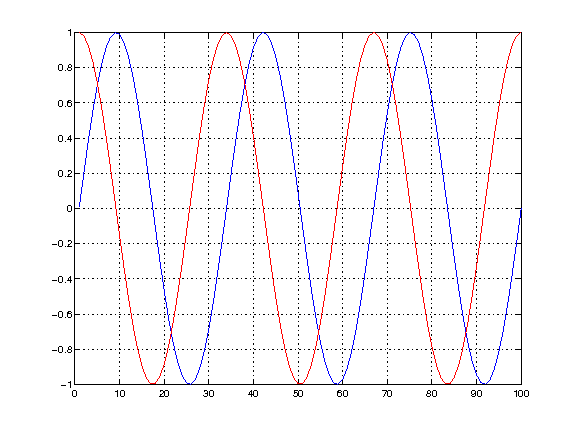

In [19]:
%%matlab
a = linspace(0.01,6*pi,100);
plot(sin(a))
grid on
hold on
plot(cos(a),'r')

Pomocí `-i` a `-o` můžeme posílat / získávat proměnné. *Pozor, zdá se, že toto nefunguje spolehlivě pokud voláme `%%matlab` vícekrát se stejnými proměnnými.*

In [20]:
a = np.array([1,2,3])

In [21]:
%%matlab -i a -o x
x = 2 * a;

Proměnné z Matlabu přicházejí jako obejkty PyTables.

In [22]:
type(x)

tables.array.Array

In [25]:
print(np.array(x))

[[2]
 [4]
 [6]]


#### Octave
Pokud nemáte (rádi) Matlab, můžete použít Octave pomocí [Oct2Py](http://pythonhosted.org/oct2py/). Oct2Py navíc poskytuje lepší možnosti než pymatbridge, takže pokud váš kód pod Octave funguje, může to být preferovaná možnost.

In [26]:
import oct2py
import numpy as np

Získáme instanci Octave.

In [27]:
oc = oct2py.Oct2Py()

Tento objekt obsahuje přímo základní funkce.

In [28]:
print(oc.abs(-1))

1


Funguje i Pythonovská nápověda.

In [29]:
help(oc.abs)

Help on function abs in module oct2py.session:

abs(*args, **kwargs)
    'abs' is a built-in function
    
     -- Mapping Function:  abs (Z)
         Compute the magnitude of Z, defined as |Z| = `sqrt (x^2 + y^2)'.
    
         For example:
    
              abs (3 + 4i)
                  => 5
    
    
    Additional help for built-in functions and operators is
    available in the online version of the manual.  Use the command
    'doc <topic>' to search the manual index.
    
    Help and information about Octave is also available on the WWW
    at http://www.octave.org and via the help@octave.org
    mailing list.



oct2py umí pracovat s NumPy poli pro vstup i výstup.

In [30]:
oc.svd(np.array([[1,2], [1,3]]))

array([[ 3.86432845],
       [ 0.25877718]])

Některé funkce v Octave (stejně jako v Matlabu), např. `svd`, vrací jiný výstup podle počtu výstupních proměnných. I toto je v oct2py podporováno.

In [31]:
U, S, V = oc.svd([[1,2], [1,3]])
print(U)
print(S)
print(V)

[[-0.57604844 -0.81741556]
 [-0.81741556  0.57604844]]
[[ 3.86432845  0.        ]
 [ 0.          0.25877718]]
[[-0.36059668 -0.93272184]
 [-0.93272184  0.36059668]]


### IDL

Pokud se konečně chcete zbavit obludy jménem [IDL](http://en.wikipedia.org/wiki/IDL_(programming_language)) (Interactive Data Language) a nemáte čas všechny vaše programy hned přepisovat do Pythonu, pomůže vám [pIDLy](https://github.com/anthonyjsmith/pIDLy), případně ve spojení s [ipython-idlmagic](https://github.com/ebellm/ipython-idlmagic).

In [32]:
import pidly

Použijeme GDL, což je open source náhražka IDL (podobně jako Octave pro Matlab).

In [33]:
idl = pidly.IDL('/usr/bin/gdl', idl_prompt='GDL> ')

In [34]:
idl('x = total([1, 1], /int)')

Proměnné z IDL získáme takto

In [35]:
idl.x

array(2)

nebo takto (tato varianta by měla být rychlejší)

In [36]:
print idl.ev('x')

2


Sezení ukončíme pomocí `close`.

In [37]:
idl.close()

Pro notebook můžeme použít `%idl` po instalaci rozšíření.

In [38]:
%install_ext https://raw.github.com/ebellm/ipython-idlmagic/master/idlmagic.py

Installed idlmagic.py. To use it, type:
  %load_ext idlmagic


In [39]:
%load_ext idlmagic

IDL not found, using GDL


`%idl` automaticky detekuje, zda použít IDL či GDL.

In [40]:
%idl print, findgen(5)

      0.00000      1.00000      2.00000      3.00000      4.00000

### Mathematica

Pro integraci Mathematica existuje [pythonica](https://github.com/bjedwards/pythonica) a také [IPython rozšíření](https://github.com/bjedwards/IPython-mathematicamagic-extension). Pro opačný proces, tj. použití Pythonu v Mathematice, lze použít [pythonika](https://code.google.com/p/pythonika/).

### Sage -> Maple, Maxima, Matlab, Octave, ...

Sage dokáže volat mnoho externích nástrojů, viz [dokumentace](http://www.sagemath.org/doc/reference/interfaces/sage/interfaces/maple.html).